In [1]:
%matplotlib inline

In C:\Users\djordanova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\djordanova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\djordanova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\djordanova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed tw

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats

# Telco customers churn
## What is the profile of a telco customer that churns? Which factors most contribute to determining the chruning model?
### Author: Daniela Yordanova

### Abstract
Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct efect on the revenues of the companies, especially in the telecom feld, companies are seeking to develop means to predict potential
customer to churn. Therefore, fnding factors that increase customer churn is important to take necessary actions to reduce this churn. The main contribution of this work is to analyze and define which factors most contribute to the subscribers churning model. This project starts with a definition of hypothesis (alternative) and contains exploratory data analysis on different continuos and categorical features creating a profile of a customer who is most likely to churn. The hypothesis is tested through two different datasets from independant sources.

### Introduction

This project investigates the factors the govern the churn in a telecommunications company and analyses the their affects on churn.

Our field of study concerns the churn in a telecommunications company and how it is affected by various factors such as age, gender, senior citizenship, dependentship, various services subscribed for, contracts types, monthly and total charges.

Hypothesis H0: There is nothing interesting in the data/ no factors contribute to the churning model.

Hypothesis H1: The churn in the company depends on the gender of its customers, the various services they have subscribed for like online security and device protection, their contracts types, and their total and monthly charges.

### Data sources: reading and exploring
#### Information about the datasets
The datasets provides information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

Link for getting datasets: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2018/09/12/base-samples-for-ibm-cognos-analytics

Link for other dataset: https://www.kaggle.com/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv

Each table and features from dataset 1 are described on the [link](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113).

Fueatures from dataset 2 are described [here](https://www.kaggle.com/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv).

### Explore dataset 1

In [3]:
# Read the first table 'Telco_customer_churn_demographics.xlsx'. Let's save it
dataset1_demographics = pd.read_excel('Telco_customer_churn_demographics.xlsx')

In [4]:
dataset1_demographics

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Female,30,No,No,No,No,0
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2


In [5]:
#dataset1_demographics.info()

In [6]:
#dataset1_demographics.dtypes

In [7]:
# Read table 'Telco_customer_churn_location.xlsx'. Let's save it
dataset1_location = pd.read_excel('Telco_customer_churn_location.xlsx')

In [8]:
dataset1_location

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330


In [9]:
# Merge both dataframes. Save the result (a new dataframe)
dataset1_demographics_location = pd.merge(dataset1_demographics, dataset1_location, how = 'left', on = 'Customer ID')

In [10]:
# Read the new dataframe
dataset1_demographics_location

,Customer ID,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Female,30,No,No,No,No,0,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330


In [11]:
# Read table 'Telco_customer_churn_services.xlsx'. Save it
dataset1_services = pd.read_excel('Telco_customer_churn_services.xlsx')

In [12]:
dataset1_services

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,No,0,72,None,Yes,22.77,No,...,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,...,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,2234-XADUH,1,Q3,Yes,4,72,None,Yes,29.66,Yes,...,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,4801-JZAZL,1,Q3,Yes,1,11,None,No,0.00,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [13]:
# Merge dataframes 'dataset1_demographics_location' and 'dataset1_services'
dataset1_demographics_location_services = pd.merge(dataset1_demographics_location, dataset1_services, how = 'left', on = 'Customer ID')

In [14]:
# Read the new dataframe
dataset1_demographics_location_services

,Customer ID,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,1,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Female,30,No,No,No,No,0,1,...,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2,1,...,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2,1,...,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2,1,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [15]:
# Read table 'Telco_customer_churn_status.xlsx'. Save it
dataset1_status = pd.read_excel('Telco_customer_churn_status.xlsx')

In [16]:
dataset1_status

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN


In [17]:
#dataset1_status.info()

In [18]:
# Merge dataset1_status with dataset1_demographics_location_services
dataset1_demographics_location_services_status = pd.merge(dataset1_demographics_location_services, dataset1_status, how='left', on='Customer ID')

In [19]:
# Read the outcome
dataset1_demographics_location_services_status

,Customer ID,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,...,Count_y,Quarter_y,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,...,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,...,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,1,...,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,...,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,...,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Female,30,No,No,No,No,0,1,...,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2,1,...,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2,1,...,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2,1,...,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN


In [20]:
# Save the dataset1_demographics_location_services_status as dataset1
dataset1 = dataset1_demographics_location_services_status

In [21]:
dataset1

,Customer ID,Count_x,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_y,...,Count_y,Quarter_y,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,...,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,...,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,1,...,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,...,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,...,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Female,30,No,No,No,No,0,1,...,1,Q3,5,Stayed,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2,1,...,1,Q3,3,Stayed,No,0,59,2140,NaN,NaN
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2,1,...,1,Q3,4,Stayed,No,0,71,5560,NaN,NaN
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2,1,...,1,Q3,4,Stayed,No,0,59,2793,NaN,NaN


In [22]:
# Read table 'Telco_customer_churn_population.xlsx'. Let's save it
#dataset1_population = pd.read_excel('Telco_customer_churn_population.xlsx')
#, columns = ['ID', 'Zip_Code', 'Population'])

In [23]:
# There is nothing intresting in this data taht will be used for our hypothesis check. Hence we can skip it further.
#dataset1_population

In [24]:
# After running this cell we will see that we have no missing values
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 56 columns):
Customer ID                          7043 non-null object
Count_x                              7043 non-null int64
Gender                               7043 non-null object
Age                                  7043 non-null int64
Under 30                             7043 non-null object
Senior Citizen                       7043 non-null object
Married                              7043 non-null object
Dependents                           7043 non-null object
Number of Dependents                 7043 non-null int64
Count_y                              7043 non-null int64
Country                              7043 non-null object
State                                7043 non-null object
City                                 7043 non-null object
Zip Code                             7043 non-null int64
Lat Long                             7043 non-null object
Latitude                    

In [25]:
# Drop Count_y column
dataset1 = dataset1.drop('Count_y', axis=1)
#dataset1.head(5)

In [26]:
# Drop Quarter_y column
dataset1 = dataset1.drop('Quarter_y', axis=1)
#dataset1.head(5)

In [27]:
#dataset1.info()

In [28]:
dataset1 = dataset1.rename(columns = {
    'Customer ID':'customer_id', 
    'Count': 'count', 
    'Gender': 'gender', 
    'Age': 'age', 
    'Under 30': 'under_30', 
    'Senior Citizen': 'senior_citizen', 
    'Married': 'married', 
    'Dependents': 'dependents', 
    'Number of Dependents': 'number_of_dependents',
    'Country': 'country', 
    'State': 'state', 
    'City': 'city', 
    'Zip Code': 'zip_code', 
    'Lat Long': 'lat_long', 
    'Latitude': 'latitude', 
    'Longitude': 'longitude', 
    'Count_x': 'count_x', 
    'Quarter_x': 'quarter_x',
    'Referred a Friend': 'referred_a_friend',
    'Number of Referrals': 'number_of_referrals', 
    'Tenure in Months': 'tenure_in_months',
    'Offer': 'offer',
    'Phone Service': 'phone_service',
    'Avg Monthly Long Distance Charges': 'avg_monthly_long_distance_charges',
    'Multiple Lines': 'multiple_lines', 
    'Internet Service': 'internet_service',
    'Internet Type': 'internet_type',
    'Avg Monthly GB Download': 'avg_monthly_GB_download',
    'Online Security': 'online_security', 
    'Online Backup': 'online_backup',
    'Device Protection Plan': 'device_protection_plan',
    'Premium Tech Support': 'premium_tech_support',
    'Streaming TV': 'streaming_TV',
    'Streaming Movies': 'streaming_movies',
    'Streaming Music': 'streaming_music',
    'Unlimited Data': 'unlimited_data', 
    'Contract': 'contract',
    'Paperless Billing': 'paperless_billing',
    'Payment Method': 'payment_method', 
    'Monthly Charge': 'monthly_charge',
    'Total Charges': 'total_charges',
    'Total Refunds': 'total_refunds',
    'Total Extra Data Charges': 'total_extra_data_charges',
    'Total Long Distance Charges': 'total_long_distance_charges',
    'Total Revenue': 'total_revenue',
    'Satisfaction Score': 'satisfaction_score',
    'Customer Status': 'customer_status',
    'Churn Label': 'churn_label',
    'Churn Value': 'churn_value',
    'Churn Score': 'churn_score',
    'CLTV': 'CLTV',
    'Churn Category': 'churn_category',
    'Churn Reason': 'churn_reason'     
})

In [29]:
#dataset1

In [30]:
#dataset1.info()

In [31]:
# Statistics for the columns (features). Set it to all, since default is to describe just the numeric features.
dataset1.describe(include = 'all')

,customer_id,count_x,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,...,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_label,churn_value,churn_score,CLTV,churn_category,churn_reason
count,7043,7043.0,7043,7043.000000,7043,7043,7043,7043,7043.000000,7043,...,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,1869,1869
unique,7043,NaN,2,NaN,2,2,2,2,NaN,1,...,NaN,NaN,NaN,3,2,NaN,NaN,NaN,5,20
top,2190-PHBHR,NaN,Male,NaN,No,No,No,No,NaN,United States,...,NaN,NaN,NaN,Stayed,No,NaN,NaN,NaN,Competitor,Competitor had better devices
freq,1,NaN,3555,NaN,5642,5901,3641,5416,NaN,7043,...,NaN,NaN,NaN,4720,5174,NaN,NaN,NaN,841,313
mean,NaN,1.0,NaN,46.509726,NaN,NaN,NaN,NaN,0.468692,NaN,...,749.099262,3034.379056,3.244924,NaN,NaN,0.265370,58.505040,4400.295755,NaN,NaN
std,NaN,0.0,NaN,16.750352,NaN,NaN,NaN,NaN,0.962802,NaN,...,846.660055,2865.204542,1.201657,NaN,NaN,0.441561,21.170031,1183.057152,NaN,NaN
min,NaN,1.0,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000,NaN,...,0.000000,21.360000,1.000000,NaN,NaN,0.000000,5.000000,2003.000000,NaN,NaN
25%,NaN,1.0,NaN,32.000000,NaN,NaN,NaN,NaN,0.000000,NaN,...,70.545000,605.610000,3.000000,NaN,NaN,0.000000,40.000000,3469.000000,NaN,NaN
50%,NaN,1.0,NaN,46.000000,NaN,NaN,NaN,NaN,0.000000,NaN,...,401.440000,2108.640000,3.000000,NaN,NaN,0.000000,61.000000,4527.000000,NaN,NaN
75%,NaN,1.0,NaN,60.000000,NaN,NaN,NaN,NaN,0.000000,NaN,...,1191.100000,4801.145000,4.000000,NaN,NaN,1.000000,75.500000,5380.500000,NaN,NaN


In [32]:
# Check if we have any NaN values
dataset1.isnull().values.any()

True

In [33]:
# Validate that we have addressed any NaN values
print(dataset1.isnull().values.any())
dataset1.isnull().sum()

True


customer_id                             0
count_x                                 0
gender                                  0
age                                     0
under_30                                0
senior_citizen                          0
married                                 0
dependents                              0
number_of_dependents                    0
country                                 0
state                                   0
city                                    0
zip_code                                0
lat_long                                0
latitude                                0
longitude                               0
count_x                                 0
quarter_x                               0
referred_a_friend                       0
number_of_referrals                     0
tenure_in_months                        0
offer                                   0
phone_service                           0
avg_monthly_long_distance_charges 

In [34]:
dataset1 = dataset1.fillna(-1)

In [35]:
dataset1

,customer_id,count_x,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,...,total_long_distance_charges,total_revenue,satisfaction_score,customer_status,churn_label,churn_value,churn_score,CLTV,churn_category,churn_reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,United States,...,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,United States,...,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,United States,...,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,United States,...,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,United States,...,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Female,30,No,No,No,No,0,United States,...,1639.44,3039.53,5,Stayed,No,0,45,5306,-1,-1
7039,6840-RESVB,1,Male,38,No,No,Yes,Yes,2,United States,...,865.20,2807.47,3,Stayed,No,0,59,2140,-1,-1
7040,2234-XADUH,1,Female,30,No,No,Yes,Yes,2,United States,...,2135.52,9453.04,4,Stayed,No,0,71,5560,-1,-1
7041,4801-JZAZL,1,Female,32,No,No,Yes,Yes,2,United States,...,0.00,319.21,4,Stayed,No,0,59,2793,-1,-1


In [36]:
dataset1.total_charges

0         39.65
1        633.30
2       1752.55
3       2514.50
4       2868.15
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: total_charges, Length: 7043, dtype: float64

In [37]:
dataset1 = dataset1.drop('customer_id', axis=1)
#dataset1.head()

### Descriptive Analysis on dataset 1

In [38]:
# Find correlations
dataset1.corr()

,count_x,age,number_of_dependents,zip_code,latitude,longitude,count_x,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,...,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,churn_value,churn_score,CLTV
count_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,-0.119000,-0.008183,-0.010305,0.007612,NaN,-0.025141,0.009927,-0.011749,...,0.144685,0.059684,0.024168,0.025036,0.003065,0.048265,-0.085170,0.115760,0.083919,-0.001826
number_of_dependents,NaN,-0.119000,1.000000,0.016493,0.029081,-0.024271,NaN,0.278003,0.108237,-0.007324,...,-0.131837,0.022535,0.014023,-0.014436,0.068966,0.038038,0.152873,-0.218780,-0.160743,0.049611
zip_code,NaN,-0.008183,0.016493,1.000000,0.894769,-0.790564,NaN,0.001463,0.007146,0.005894,...,-0.010775,0.001978,-0.003797,-0.014550,0.005063,0.002944,0.002121,-0.016289,-0.018020,-0.003207
latitude,NaN,-0.010305,0.029081,0.894769,1.000000,-0.885979,NaN,0.018715,0.011963,0.002631,...,-0.030325,-0.002784,-0.009901,-0.013233,0.008029,0.000082,0.022367,-0.041546,-0.037615,0.000214
longitude,NaN,0.007612,-0.024271,-0.790564,-0.885979,1.000000,NaN,-0.009893,-0.009672,-0.004341,...,0.028429,0.003811,-0.000597,0.010461,-0.006923,0.001062,-0.009048,0.024052,0.019394,-0.000513
count_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_referrals,NaN,-0.025141,0.278003,0.001463,0.018715,-0.009893,NaN,1.000000,0.326975,0.006336,...,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853,0.188926,-0.286540,-0.202209,0.122843
tenure_in_months,NaN,0.009927,0.108237,0.007146,0.011963,-0.009672,NaN,0.326975,1.000000,0.014596,...,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146,0.210557,-0.352861,-0.224982,0.396292
avg_monthly_long_distance_charges,NaN,-0.011749,-0.007324,0.005894,0.002631,-0.004341,NaN,0.006336,0.014596,1.000000,...,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291,0.001146,0.008120,0.021857,0.023858


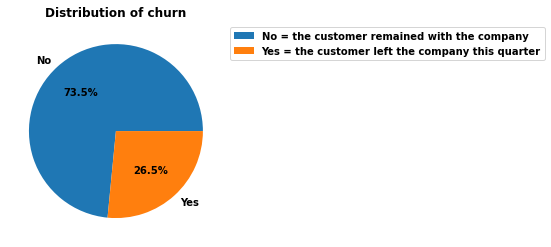

In [39]:
# First, we get a high level view of the distribution of Churn. What percentage of customer in our dataset are churning vs not churning.
customers_churn_label = dataset1.groupby('churn_label')['churn_label'].count()
plt.pie(customers_churn_label.values, labels = (
    customers_churn_label.index), autopct = '%1.1f%%')
plt.title('Distribution of churn')
plt.legend(['No = the customer remained with the company', 'Yes = the customer left the company this quarter'], bbox_to_anchor = (1, 1), loc = 'upper left')
plt.show()

#### Categorize Features

We will categorize some of the attributes / features based on wheather they are categorical values or continuous (i.e numerical) values. We will use this in later sections to build visualizations.

In [40]:
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in dataset1.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in dataset1.columns if x != 'churn_label']
categorical_features = list(np.array(dataset1.columns)[columns_idx][string_fields])
categorical_featues = [x for x in categorical_features if x != 'churn_label']
continuous_features = [x for x in all_features if x not in categorical_features]

print('All Features: ', all_features)
print('\nCategorical Features: ', categorical_features)
print('\nContinuous Features: ', continuous_features)
print('\nAll Categorical Features: ', categorical_features)

All Features:  ['count_x', 'gender', 'age', 'under_30', 'senior_citizen', 'married', 'dependents', 'number_of_dependents', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude', 'count_x', 'quarter_x', 'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer', 'phone_service', 'avg_monthly_long_distance_charges', 'multiple_lines', 'internet_service', 'internet_type', 'avg_monthly_GB_download', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_TV', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'satisfaction_score', 'customer_status', 'churn_value', 'churn_score', 'CLTV', 'churn_category', 'churn_reason']

Categorical Features:  ['gender', 'under_30', 'senior_citizen', 'married', 'dependents', 'country', 'state', 'city'

#### Exploratory Data Analysis on continuous features

In [41]:
# Describe columns with numerical values
pd.set_option('precision', 3)
dataset1.describe()

,count_x,age,number_of_dependents,zip_code,latitude,longitude,count_x,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,...,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,churn_value,churn_score,CLTV
count,7043.0,7043.00,7043.000,7043.000,7043.000,7043.000,7043.0,7043.000,7043.000,7043.000,...,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000,7043.000
mean,1.0,46.51,0.469,93486.071,36.197,-119.757,1.0,1.952,32.387,22.959,...,64.762,2280.381,1.962,6.861,749.099,3034.379,3.245,0.265,58.505,4400.296
std,0.0,16.75,0.963,1856.768,2.469,2.154,0.0,3.001,24.542,15.448,...,30.090,2266.220,7.903,25.105,846.660,2865.205,1.202,0.442,21.170,1183.057
min,1.0,19.00,0.000,90001.000,32.556,-124.301,1.0,0.000,1.000,0.000,...,18.250,18.800,0.000,0.000,0.000,21.360,1.000,0.000,5.000,2003.000
25%,1.0,32.00,0.000,92101.000,33.991,-121.788,1.0,0.000,9.000,9.210,...,35.500,400.150,0.000,0.000,70.545,605.610,3.000,0.000,40.000,3469.000
50%,1.0,46.00,0.000,93518.000,36.205,-119.595,1.0,0.000,29.000,22.890,...,70.350,1394.550,0.000,0.000,401.440,2108.640,3.000,0.000,61.000,4527.000
75%,1.0,60.00,0.000,95329.000,38.161,-117.970,1.0,3.000,55.000,36.395,...,89.850,3786.600,0.000,0.000,1191.100,4801.145,4.000,1.000,75.500,5380.500
max,1.0,80.00,9.000,96150.000,41.962,-114.193,1.0,11.000,72.000,49.990,...,118.750,8684.800,49.790,150.000,3564.720,11979.340,5.000,1.000,96.000,6500.000


Let's explore some of the features with numerical values and see how do they contribute to the churning model.

We can get use histrogram and bar charts to get an understanding of the distribution of our continuous / numerical features relative to Churn.

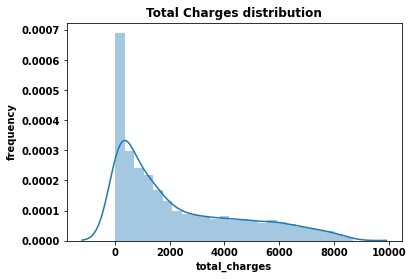

Skewness:  0.9637910860571924


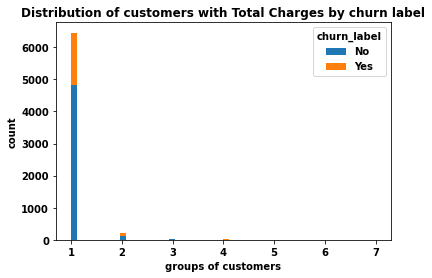

In [131]:
# Distribution of Total Charges feature
sns.distplot(dataset1['total_charges'])
plt.title('Total Charges distribution')
plt.ylabel('frequency')
plt.show()
print('Skewness: ', dataset1['total_charges'].skew())

# Distribution of Total Charges by churn label
dataset1.groupby(['total_charges', 'churn_label']).size().unstack().plot(kind = 'hist', bins = 50, stacked = True, figsize = (6,4))
plt.title('Distribution of customers with Total Charges by churn label')
plt.xlabel('groups of customers')
plt.ylabel('count')
plt.show()

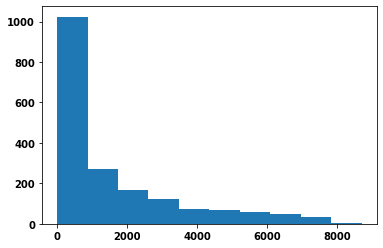

In [43]:
dataset1_churn = dataset1[(dataset1.churn_value == 1)]
plt.hist(dataset1_churn.total_charges)
plt.show()

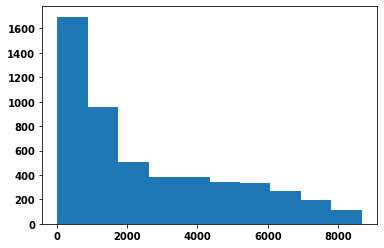

In [44]:
dataset1_no_churn = dataset1[(dataset1.churn_value == 0)]
plt.hist(dataset1_no_churn.total_charges)
plt.show()

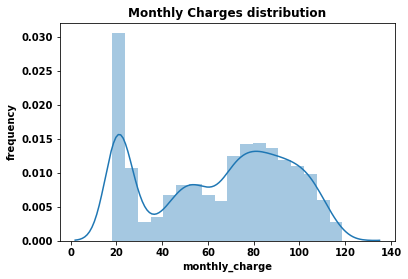

Skewness:  -0.22052443394398033


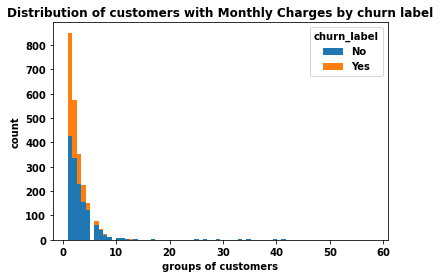

In [133]:
# Distribution of Monthly Charges feature
sns.distplot(dataset1['monthly_charge'])
plt.title('Monthly Charges distribution')
plt.ylabel('frequency')
plt.show()
print('Skewness: ', dataset1['monthly_charge'].skew())

# Distribution of Monthly Charges by churn label (quantative distribution)
dataset1.groupby(['monthly_charge', 'churn_label']).size().unstack().plot(kind = 'hist', bins = 70, stacked = True, figsize = (6,4))
plt.title('Distribution of customers with Monthly Charges by churn label')
plt.xlabel('groups of customers')
plt.ylabel('count')
plt.show()

In [46]:
dataset1.monthly_charge[dataset1.monthly_charge<19]

1069    18.95
1965    18.95
2418    18.85
2542    18.95
3273    18.85
3278    18.70
3515    18.40
3553    18.85
3592    18.80
3717    18.80
4241    18.80
4281    18.95
4557    18.95
4929    18.25
5126    18.85
5288    18.85
5340    18.80
5479    18.95
5525    18.75
5720    18.90
6254    18.80
6394    18.90
6423    18.80
6791    18.55
6956    18.70
6970    18.80
Name: monthly_charge, dtype: float64

In [47]:
dataset1.groupby(['monthly_charge', 'churn_label']).size()

monthly_charge  churn_label
18.25           No             1
18.40           No             1
18.55           No             1
18.70           No             2
18.75           No             1
                              ..
118.20          No             1
118.35          Yes            1
118.60          No             2
118.65          No             1
118.75          No             1
Length: 2370, dtype: int64

In [48]:
dataset1.groupby(['monthly_charge', 'churn_label']).size().unstack()

churn_label,No,Yes
monthly_charge,,
18.25,1.0,NaN
18.40,1.0,NaN
18.55,1.0,NaN
18.70,2.0,NaN
18.75,1.0,NaN
...,...,...
118.20,1.0,NaN
118.35,NaN,1.0
118.60,2.0,NaN


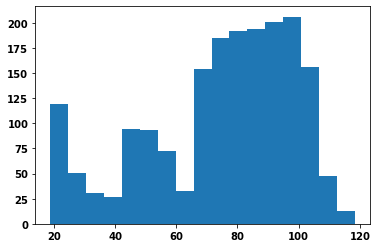

In [49]:
dataset1_churn = dataset1[(dataset1.churn_value == 1)]
#sms_data_ham = sms_data[(sms_data.label == 'ham')]
plt.hist(dataset1_churn.monthly_charge, bins = 'fd')
plt.show()

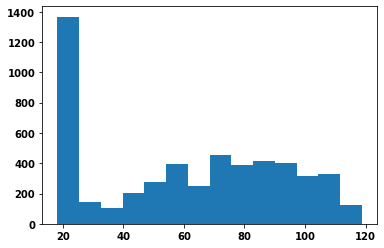

In [50]:
dataset1_churn = dataset1[(dataset1.churn_value == 0)]
#sms_data_ham = sms_data[(sms_data.label == 'ham')]
plt.hist(dataset1_churn.monthly_charge, bins = 'fd')
plt.show()

We can see that for the Monthly Charges feature, customers that churn tend to pay higher monthly fees than those that stay. This might be a reason that contributes to the churning model.

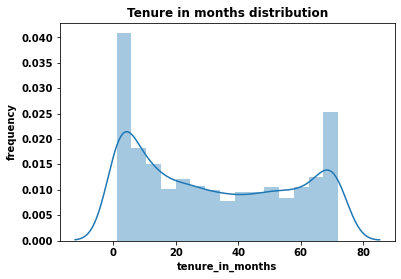

Skewness:  0.24054261407486294


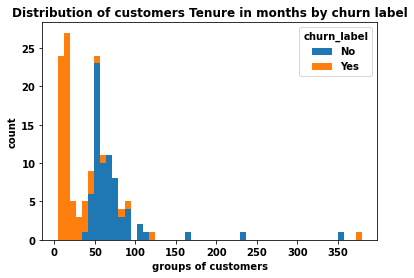

In [134]:
# Distribution of Tenure in months feature
sns.distplot(dataset1['tenure_in_months'])
plt.title('Tenure in months distribution')
plt.ylabel('frequency')
plt.show()
print('Skewness: ', dataset1['tenure_in_months'].skew())

# Distribution of Tenure in months by churn label (quantative distribution)
dataset1.groupby(['tenure_in_months', 'churn_label']).size().unstack().plot(kind = 'hist', bins= 50, stacked = True, figsize = (6,4))
plt.title('Distribution of customers Tenure in months by churn label')
plt.xlabel('groups of customers')
plt.ylabel('count')
plt.show()

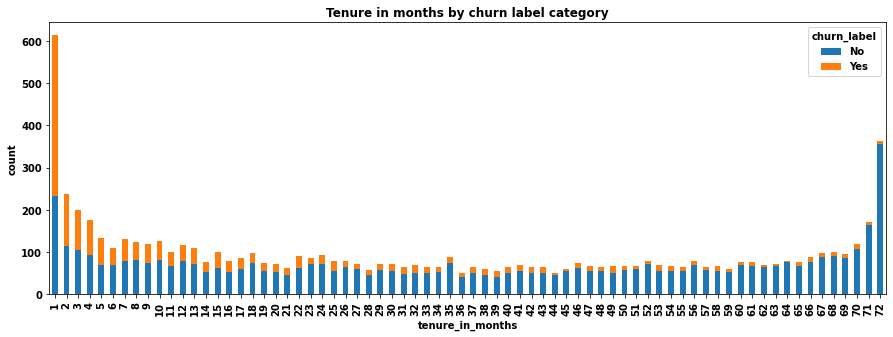

In [52]:
# Compare Tenure in months (numeric values) distributions by churn label category (comparison by category)
dataset1.groupby(['tenure_in_months', 'churn_label']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (15,5))
plt.title('Tenure in months by churn label category')
plt.xlabel('tenure_in_months')
plt.ylabel('count')
plt.show()

We can see that for the tenure feature, customers that churn tend to be relatively new customers.

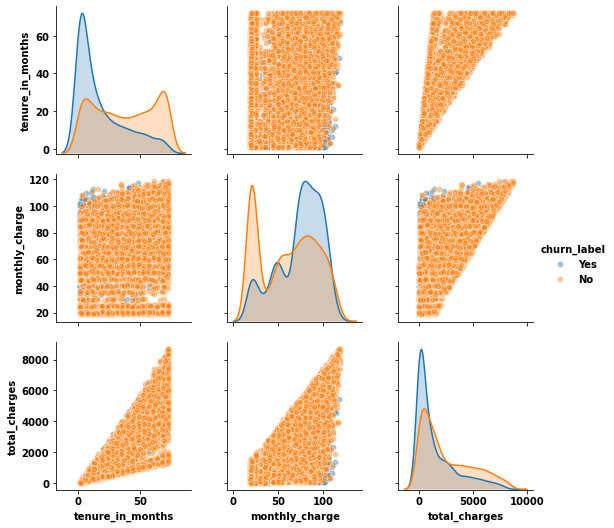

In [53]:
# Plot pairwise relationships in the dataset1
sns.pairplot(dataset1[['tenure_in_months','monthly_charge','total_charges','churn_label']], hue = 'churn_label',plot_kws = {'alpha': 0.45})
plt.show()

Customers with low tenure are more likely to churn.

Customers with high monthly charges are more likely to churn.

#### Exploratory Data Analysis on categorical features

In [54]:
# Describe columns with objects
dataset1.describe(exclude=np.number)

,gender,under_30,senior_citizen,married,dependents,country,state,city,lat_long,quarter_x,...,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,customer_status,churn_label,churn_category,churn_reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,1,1,1106,1679,1,...,2,2,2,3,2,3,3,2,6,21
top,Male,No,No,No,No,United States,California,Los Angeles,"33.362575, -117.299644",Q3,...,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed,No,-1,-1
freq,3555,5642,5901,3641,5416,7043,7043,293,43,7043,...,4311,4555,4745,3610,4171,3909,4720,5174,5174,5174


We can get use frequency counts charts to get an understanding of the categorical features relative to Churn.

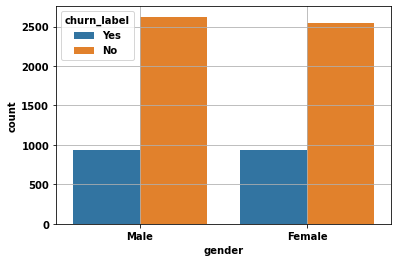

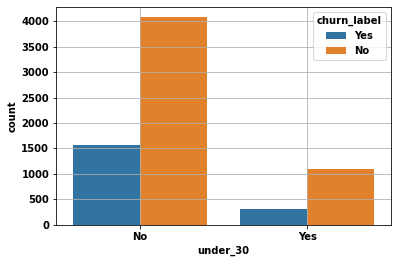

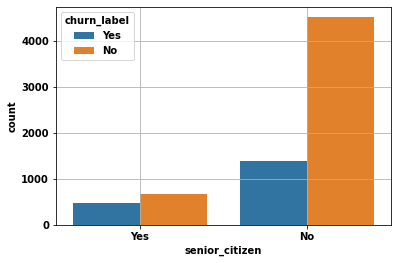

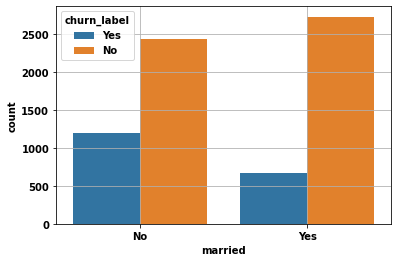

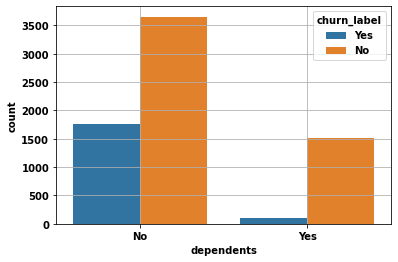

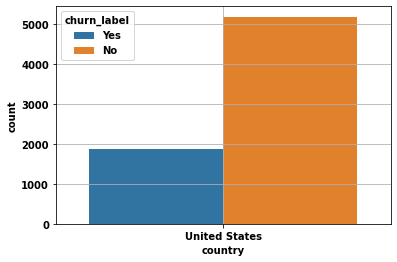

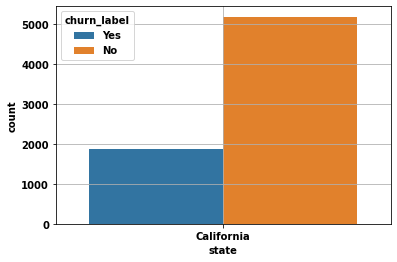

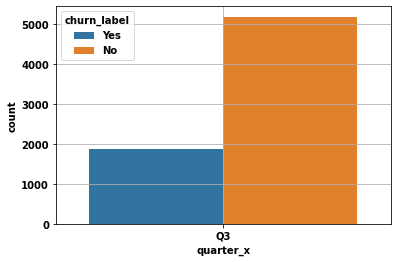

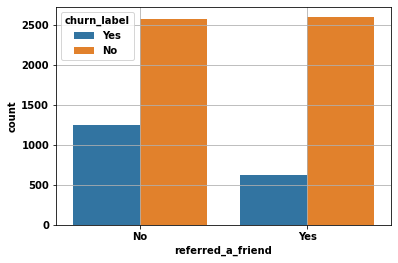

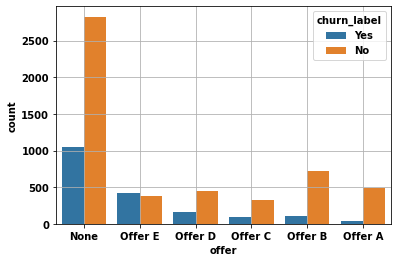

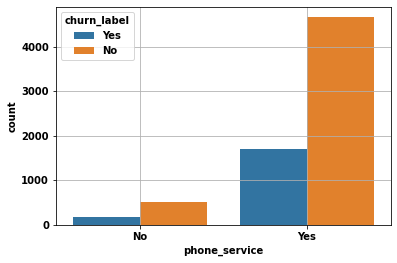

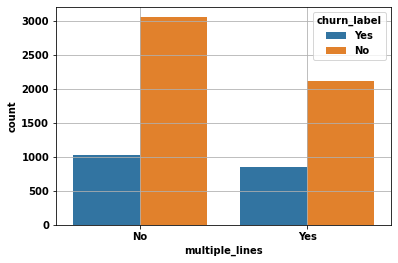

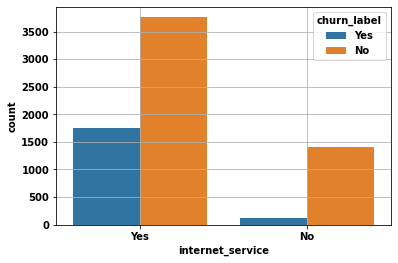

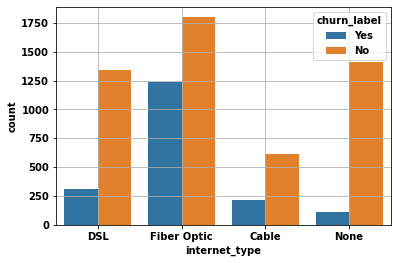

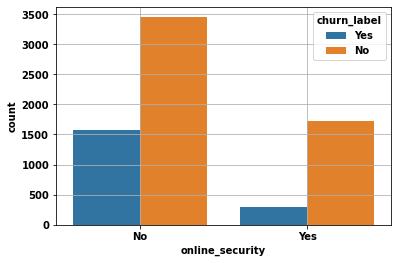

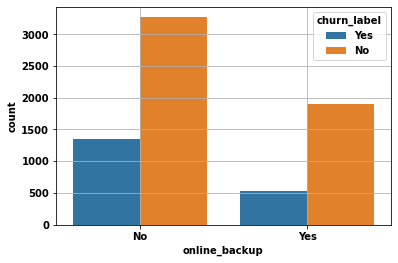

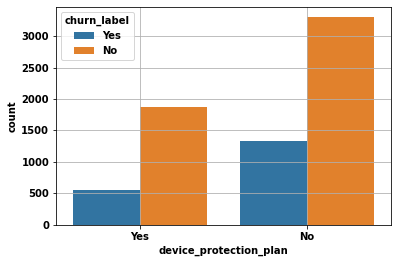

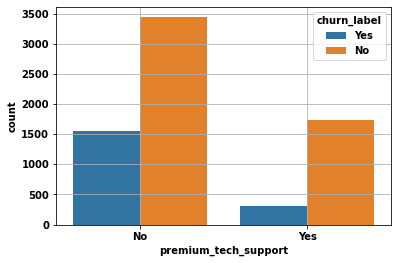

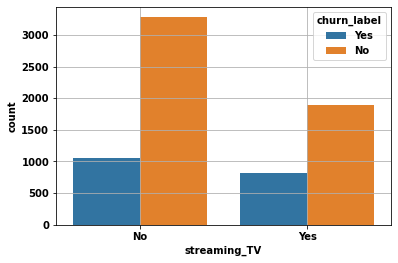

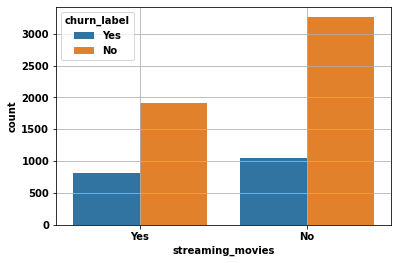

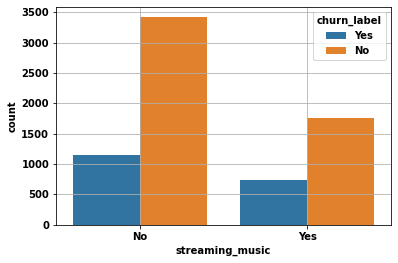

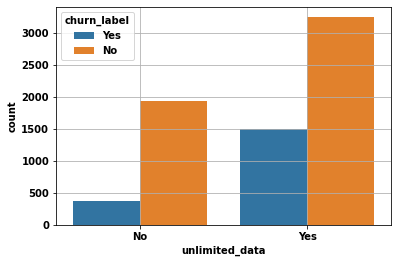

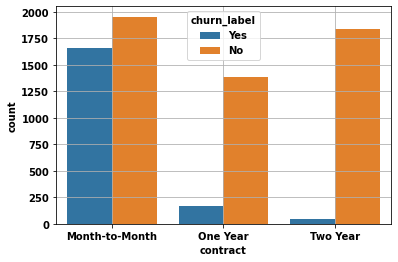

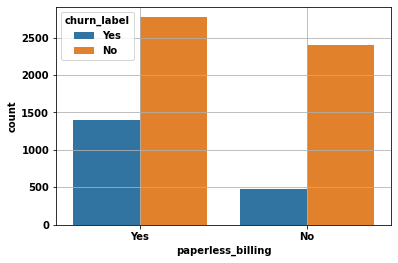

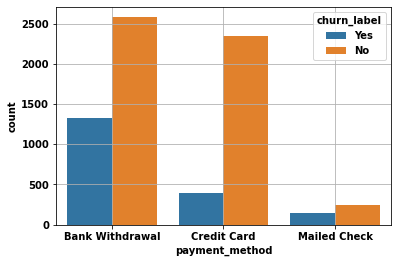

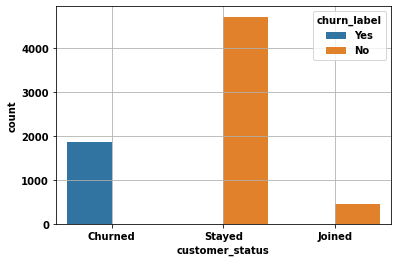

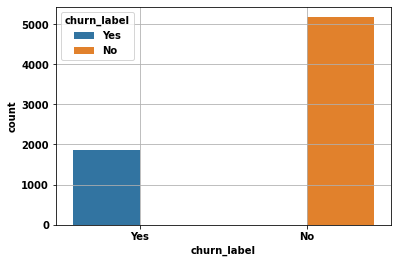

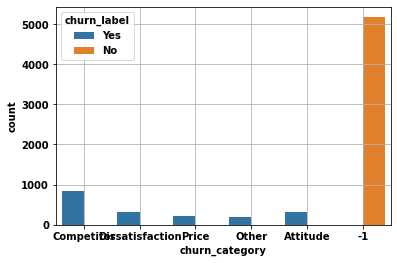

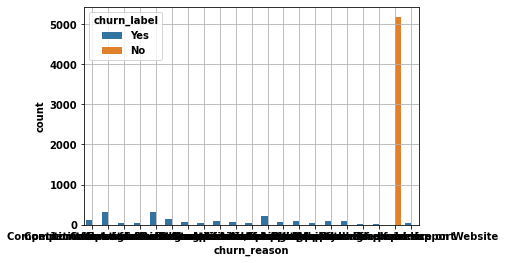

In [55]:
for c in categorical_features:
    if c != 'city' and c!= 'lat_long':
        sns.countplot(x = c, hue = 'churn_label', data = dataset1)
        plt.grid()
        plt.show()

From above we can conclude that typical profile of a customer that churns is: 

Personal information: 30 < age < 65 years, not married, without dependents

Using: phone service, internet service, fiber optic, unlimited data plan

Not using: special pricing offer, online security and backup, device protection, premium tech support

Others: on a month-to-month contract, paperless billing, bank withdrawal

Churn category: compatitor, dissatisfaction, attitude

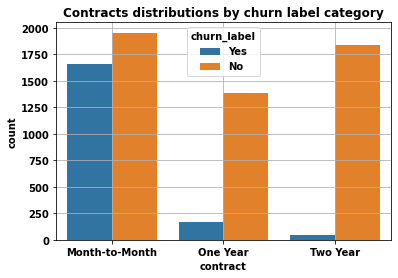

In [56]:
# Compare type of Contracts distributions by churn label category (comparison by category)
sns.countplot(x = 'contract', hue = 'churn_label', data = dataset1)
plt.title('Contracts distributions by churn label category')
plt.grid()
plt.show()

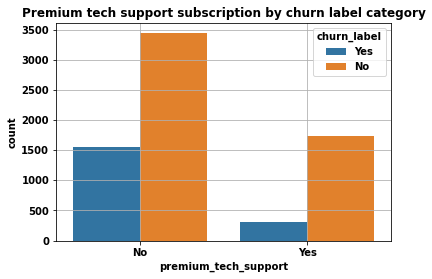

In [57]:
# Compare type of Premium tech support distributions by churn label category (comparison by category)
sns.countplot(x = 'premium_tech_support', hue = 'churn_label', data = dataset1)
plt.title('Premium tech support subscription by churn label category')
plt.grid()
plt.show()

In [58]:
# Filter customers that churned
customers_churn_data = dataset1.loc[dataset1['churn_label']=='Yes']

In [59]:
# Filter customers that stayed with the company
customers_loyalty_data = dataset1.loc[dataset1['churn_label']=='No']

In [60]:
counts_by_churn = customers_churn_data.groupby(('churn_reason')).size().sort_values()

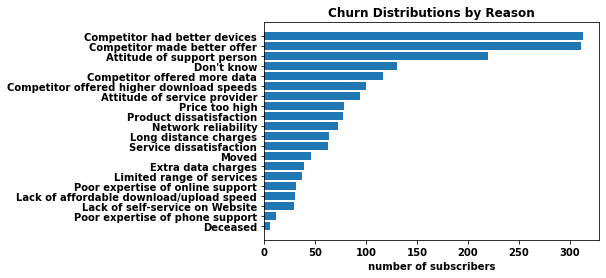

In [61]:
plt.barh(counts_by_churn.index, counts_by_churn)
plt.xlabel('number of subscribers')
plt.title('Churn Distributions by Reason')
plt.show()

Satisfaction Scores for online security are low, ranging from 1-3, for customers that churned:

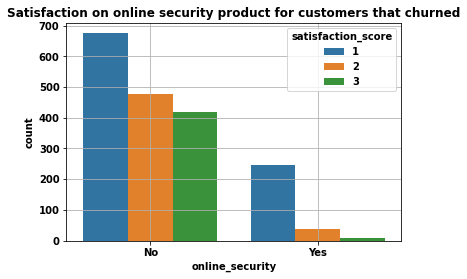

In [62]:
sns.countplot(x = 'online_security', hue = 'satisfaction_score', data = customers_churn_data)
plt.title('Satisfaction on online security product for customers that churned')
plt.grid()
plt.show()

Satisfaction Scores for online security are high, ranging from 3-5, for customers that stayed:

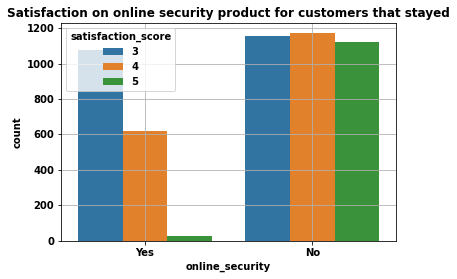

In [63]:
sns.countplot(x = 'online_security', hue = 'satisfaction_score', data = customers_loyalty_data)
plt.title('Satisfaction on online security product for customers that stayed')
plt.grid()
plt.show()

### Explore dataset 2

In [64]:
# Read table from the second dataset. Save it
dataset2 = pd.read_excel('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.xls')

In [65]:
dataset2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.9,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1.89e+03,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1.84e+03,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,152,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1.99e+03,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7.36e+03,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,307,Yes


In [66]:
# Remove CustomerID as it doesn't bring any value
dataset2 = dataset2.drop('customerID', axis=1)
dataset2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.9,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1.89e+03,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1.84e+03,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,152,Yes


In [67]:
dataset2[dataset2.index.isin([488])]
#missing_TotalCharges_filter = dataset2[("TotalCharges")].str.len() == len(" ")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


In [68]:
dataset2.isnull().values.any()

False

In [69]:
#missing_TotalCharges_filter

### Tidying and cleaning on dataset 2

In [70]:
# Check the data attributes and their types
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [71]:
print(dataset2.isnull().values.any())
dataset2.isnull().sum()

False


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Convert TotalCharges column to numeric if it is detected as object

In [72]:
dataset2['TotalCharges'] = pd.to_numeric(dataset2['TotalCharges'],errors='coerce')

In [73]:
dataset2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [74]:
dataset2[dataset2.index.isin([488])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No


In [75]:
dataset2.isnull().values.any()

True

We see that Tenure ranges from 0 (new customer) to 6 years, Monthly charges range from 18 USD to 118 USD etc.

In [76]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [77]:
#Statistics for the columns (features). Set it to all, since default is to describe just the numeric features.
dataset2.describe(include = 'all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000,7043,7043,7043.000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000,7032.000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162,NaN,NaN,32.371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.762,2283.300,NaN
std,NaN,0.369,NaN,NaN,24.559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090,2266.771,NaN
min,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250,18.800,NaN
25%,NaN,0.000,NaN,NaN,9.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500,401.450,NaN
50%,NaN,0.000,NaN,NaN,29.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350,1397.475,NaN
75%,NaN,0.000,NaN,NaN,55.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850,3794.738,NaN


Any NaN values should be removed to create a more accurate model.

In [78]:
# Fillin missing data
dataset2 = dataset2.fillna(-1)

In [79]:
dataset2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [80]:
# Check if we have any NaN values and see which features have missing values that should be addressed
print(dataset2.isnull().values.any())
dataset2.isnull().sum()

False


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [81]:
# Validate that we have addressed any NaN values
print(dataset2.isnull().values.any())
dataset2.isnull().sum()

False


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Descriptive Analysis on dataset 2

In [82]:
# Describe columns with numerical values
pd.set_option('precision', 3)
dataset2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762,2279.733
std,0.369,24.559,30.090,2266.796
min,0.000,0.000,18.250,-1.000
25%,0.000,9.000,35.500,398.550
50%,0.000,29.000,70.350,1394.550
75%,0.000,55.000,89.850,3786.600
max,1.000,72.000,118.750,8684.800


In [83]:
# Describe columns with objects
dataset2.describe(exclude=np.number)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [84]:
# Find correlations
dataset2.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000,0.017,0.220,0.103
tenure,0.017,1.000,0.248,0.826
MonthlyCharges,0.220,0.248,1.000,0.651
TotalCharges,0.103,0.826,0.651,1.000


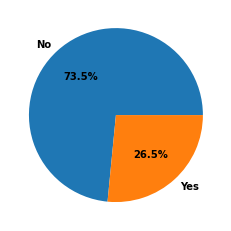

In [85]:
# Examine the the distribution of customers grouped by churn status
dataset2_churn = dataset2.groupby('Churn')['Churn'].count()
plt.pie(dataset2_churn.values, labels = (dataset2_churn.index), autopct = '%1.1f%%')
plt.show()

#### Categorize Features

We will categorize some of the attributes / features based on wheather they are categorical values or continuous (i.e numerical) values. We will use this in later sections to build visualizations.

In [86]:
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in dataset2.iloc[first_record_idx, columns_idx]] # All string fields
all_attributes = [x for x in dataset2.columns if x != 'Churn']
categorical_attributes = list(np.array(dataset2.columns)[columns_idx][string_fields])
categorical_attributes = [x for x in categorical_attributes if x != 'Churn']
continuous_attributes = [x for x in all_attributes if x not in categorical_attributes]

print('All Features: ', all_attributes)
print('\nCategorical Features: ', categorical_attributes)
print('\nNumerical Features: ', continuous_attributes)
print('\nAll Categorical Features: ', categorical_attributes)

All Features:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

Categorical Features:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numerical Features:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

All Categorical Features:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


#### Exploratory Data Analysis on continuous features

In [87]:
# Describe columns with numerical values
pd.set_option('precision', 3)
dataset2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762,2279.733
std,0.369,24.559,30.090,2266.796
min,0.000,0.000,18.250,-1.000
25%,0.000,9.000,35.500,398.550
50%,0.000,29.000,70.350,1394.550
75%,0.000,55.000,89.850,3786.600
max,1.000,72.000,118.750,8684.800


In [88]:
# Find correlations
dataset2.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000,0.017,0.220,0.103
tenure,0.017,1.000,0.248,0.826
MonthlyCharges,0.220,0.248,1.000,0.651
TotalCharges,0.103,0.826,0.651,1.000


Let's explore some of the features with numerical values and see how do they contribute to the churning model.

We can get use histrogram and bar charts to get an understanding of the distribution of our continuous / numerical features relative to Churn.

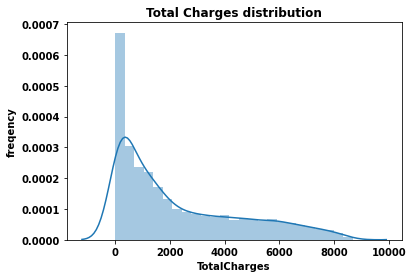

Skewness:  0.9632326268399954


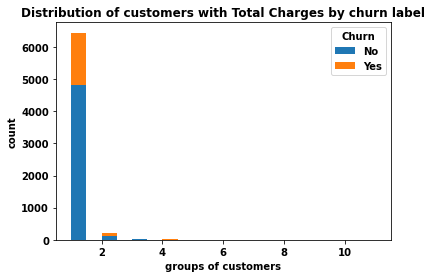

In [135]:
# Distribution of Total Charges feature
sns.distplot(dataset2['TotalCharges'])
plt.title('Total Charges distribution')
plt.ylabel('freqency')
plt.show()
print('Skewness: ', dataset2['TotalCharges'].skew())

# Distribution of Total Charges by churn label
dataset2.groupby(['TotalCharges', 'Churn']).size().unstack().plot(kind = 'hist', bins = 20, stacked = True, figsize = (6,4))
plt.title('Distribution of customers with Total Charges by churn label')
plt.xlabel('groups of customers')
plt.ylabel('count')
plt.show()

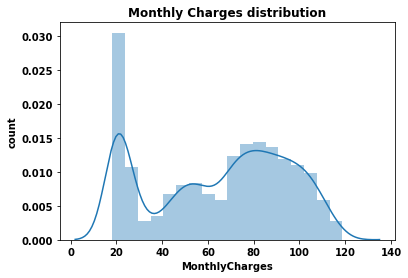

Skewness:  -0.22052443394398033


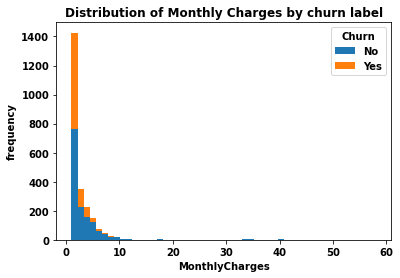

In [90]:
# Distribution of Monthly Charges feature
sns.distplot(dataset2['MonthlyCharges'])
plt.title('Monthly Charges distribution')
plt.ylabel('count')
plt.show()
print('Skewness: ', dataset2['MonthlyCharges'].skew())

# Distribution of Monthly Charges by churn label (quantative distribution)
dataset2.groupby(['MonthlyCharges', 'Churn']).size().unstack().plot(kind = 'hist', bins = 50, stacked = True, figsize = (6,4))
plt.title('Distribution of Monthly Charges by churn label')
plt.xlabel('MonthlyCharges')
plt.ylabel('frequency')
plt.show()

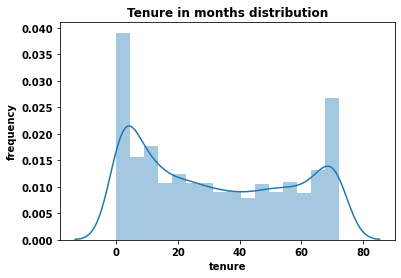

Skewness:  0.2395397495619829


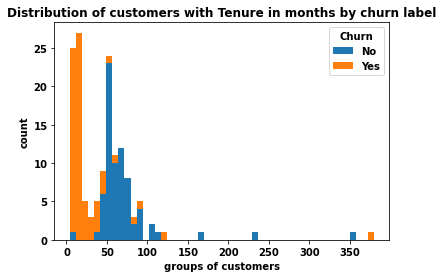

In [136]:
# Distribution of Tenure in months feature
sns.distplot(dataset2['tenure'])
plt.title('Tenure in months distribution')
plt.ylabel('frequency')
plt.show()
print('Skewness: ', dataset2['tenure'].skew())

# Distribution of Tenure in months by churn label (quantative distribution)
dataset2.groupby(['tenure', 'Churn']).size().unstack().plot(kind = 'hist', bins= 50, stacked = True, figsize = (6,4))
plt.title('Distribution of customers with Tenure in months by churn label')
plt.xlabel('groups of customers')
plt.ylabel('count')
plt.show()

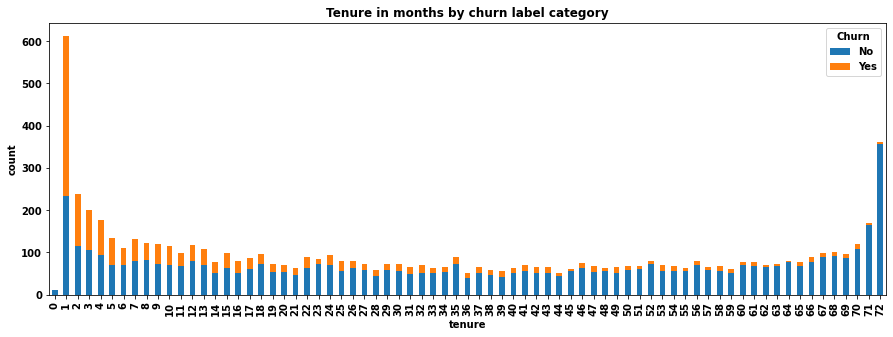

In [92]:
# Compare Tenure in months (numeric values) distributions by churn label category (comparison by category)
dataset2.groupby(['tenure', 'Churn']).size().unstack().plot(kind = 'bar', stacked = True, figsize = (15,5))
plt.title('Tenure in months by churn label category')
plt.xlabel('tenure')
plt.ylabel('count')
plt.show()

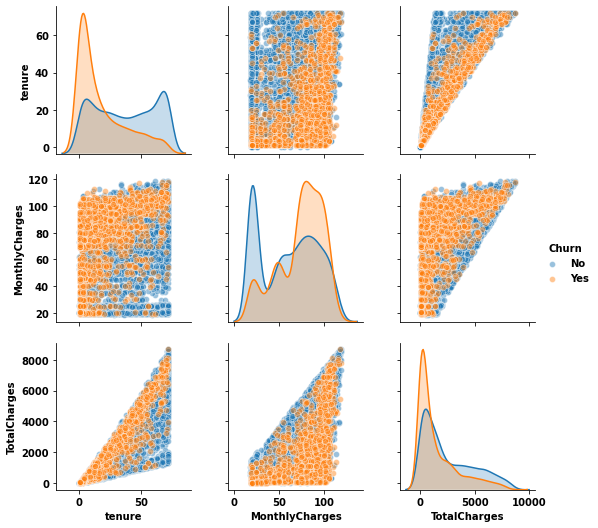

In [93]:
# Plot pairwise relationships in the dataset2
sns.pairplot(dataset2[['tenure','MonthlyCharges','TotalCharges','Churn']], hue = 'Churn',plot_kws = {'alpha': 0.45})
plt.show()

Customers with low tenure are more likely to churn.

Customers with high monthly charges are more likely to churn.

#### Exploratory Data Analysis on categorical features

In [94]:
# Describe columns with objects
dataset2.describe(exclude=np.number)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


We can get use frequency counts charts to get an understanding of the categorical features relative to Churn.

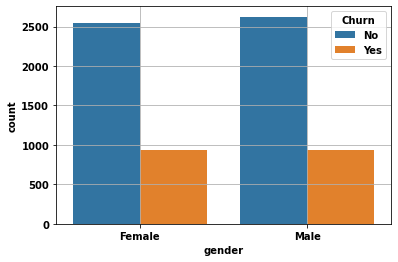

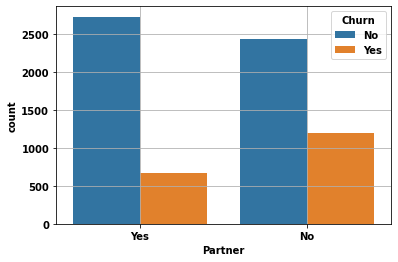

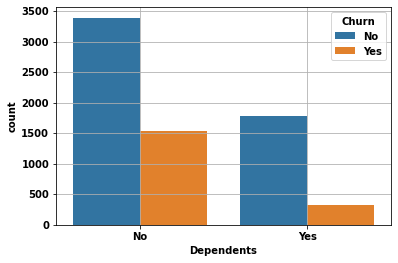

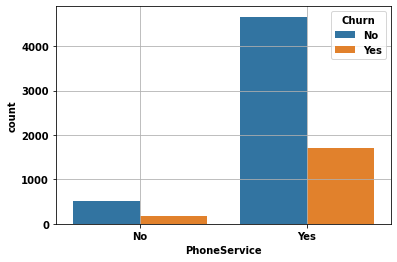

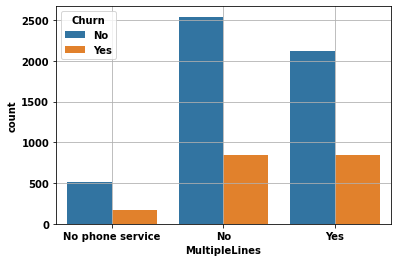

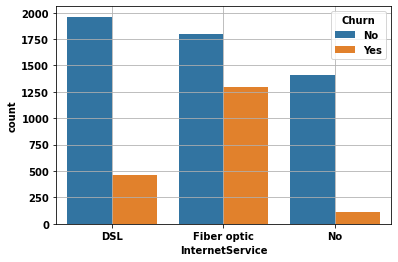

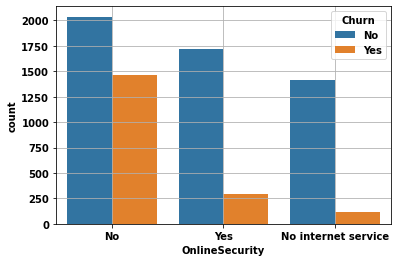

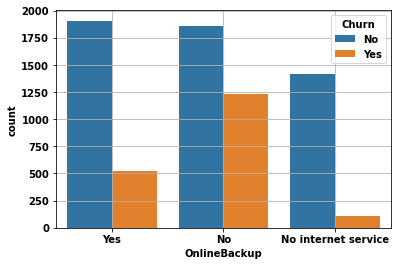

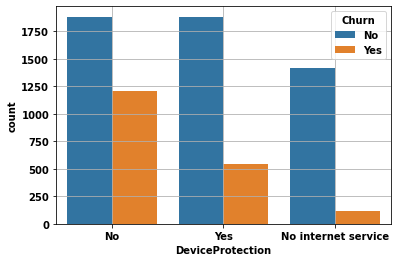

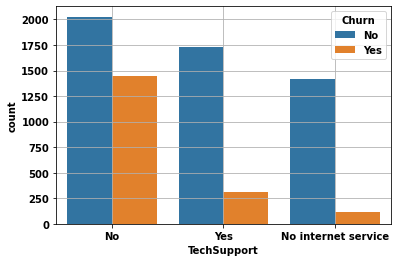

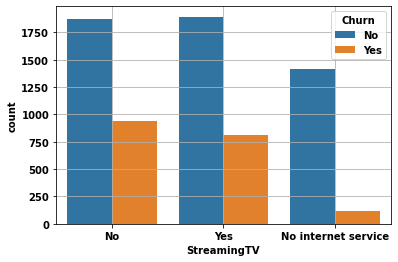

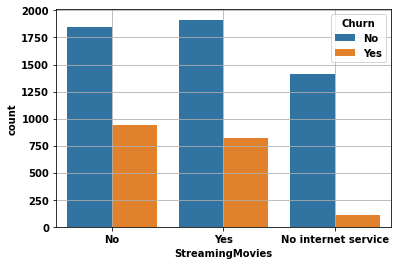

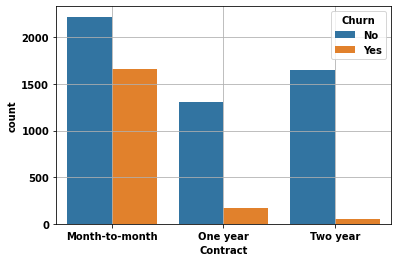

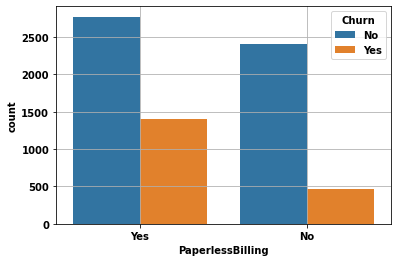

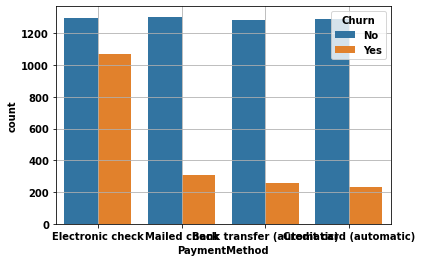

In [95]:
for c in categorical_attributes:
    sns.countplot(x = c, hue = 'Churn', data = dataset2)
    plt.grid()
    plt.show()

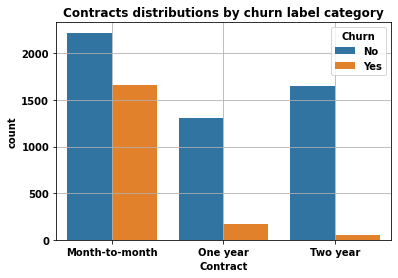

In [96]:
# Compare type of Contracts distributions by churn label category (comparison by category)
sns.countplot(x = 'Contract', hue = 'Churn', data = dataset2)
plt.title('Contracts distributions by churn label category')
plt.grid()
plt.show()

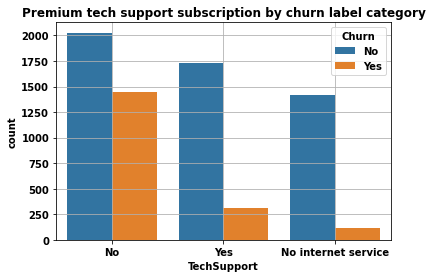

In [97]:
# Compare type of Premium tech support distributions by churn label category (comparison by category)
sns.countplot(x = 'TechSupport', hue = 'Churn', data = dataset2)
plt.title('Premium tech support subscription by churn label category')
plt.grid()
plt.show()

### Hypothesis testing
In this section, we will visually explore the data. Each variable will be compared to the target variable. We will use statistical tests to find how averages of independent variables are different in the two groups of churners and non-churners at 95% level of confidence. t-test will be used for numerical continuous variable and chi-square will be used for categorical variables.

H0: There is nothing interesting on customers tenure period, total charges and monthly charges

H1: Customers with less tenure period and total charges but with high monthly charges are more likely to churn

In [98]:
# Hypothesis testing (t-test) on dataset1
d1 = dataset1[(dataset1['churn_value'] == 1)]['tenure_in_months']
d2 = dataset1[(dataset1['churn_value'] == 0)]['tenure_in_months']
m1, m2 = d1.mean(), d2.mean()
sd1, sd2 = d1.std(), d2.std()
n1, n2 = d1.shape[0], d2.shape[0]

print('dataset1_tenure_churned_mean:', m1)
print('dataset1_tenure_no_churned_mean:', m2)
print('dataset1_tenure_churned_std:', sd1)
print('dataset1_tenure_no_churned_std:', sd2)
ttest, pval = ttest_ind(d1, d2)
print('p-value', pval)
if pval < 0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

dataset1_tenure_churned_mean: 17.979133226324237
dataset1_tenure_no_churned_mean: 37.591225357557015
dataset1_tenure_churned_std: 19.531123054519615
dataset1_tenure_no_churned_std: 24.085029001537045
p-value 1.3292218159000336e-205
We reject null hypothesis


In [99]:
# Hypothesis testing (t-test) on dataset2. Verify the result from dataset1
d3 = dataset2[(dataset2['Churn'] == 'Yes')]['tenure']
d4 = dataset2[(dataset2['Churn'] == 'No')]['tenure']
m3, m4 = d3.mean(), d4.mean()
sd3, sd4 = d3.std(), d4.std()
n3, n4 = d3.shape[0], d4.shape[0]

print('dataset2_tenure_churned_mean:', m3)
print('dataset2_tenure_no_churned_mean:', m4)
print('dataset2_tenure_churned_std:', sd3)
print('dataset2_tenure_no_churned_std:', sd4)
ttest, pvalue = ttest_ind(d3, d4)
print('p-value', pval)
if pval < 0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

dataset2_tenure_churned_mean: 17.979133226324237
dataset2_tenure_no_churned_mean: 37.56996521066873
dataset2_tenure_churned_std: 19.531123054519615
dataset2_tenure_no_churned_std: 24.113776690704025
p-value 1.3292218159000336e-205
We reject null hypothesis


In [100]:
d1 = dataset1[(dataset1['churn_value'] == 1)]['total_charges']
d2 = dataset1[(dataset1['churn_value'] == 0)]['total_charges']
m1, m2 = d1.mean(), d2.mean()
sd1, sd2 = d1.std(), d2.std()
n1, n2 = d1.shape[0], d2.shape[0]

print('dataset1_total_charges_churned_mean:', m1)
print('dataset1_total_charges_no_churned_mean:', m2)
print('dataset1_total_charges_churned_std:', sd1)
print('dataset1_total_charges_no_churned_std:', sd2)
ttest, pval = ttest_ind(d1, d2)
print('p-value', pval)
if pval <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

dataset1_total_charges_churned_mean: 1531.7960941680058
dataset1_total_charges_no_churned_mean: 2550.7921028218066
dataset1_total_charges_churned_std: 1890.8229944644038
dataset1_total_charges_no_churned_std: 2329.0917539419715
p-value 1.5388989901779986e-63
We reject null hypothesis


In [101]:
d3 = dataset2[(dataset2['Churn'] == 'Yes')]['TotalCharges']
d4 = dataset2[(dataset2['Churn'] == 'No')]['TotalCharges']
m3, m4 = d3.mean(), d4.mean()
sd3, sd4 = d3.std(), d4.std()
n3, n4 = d3.shape[0], d4.shape[0]

print('dataset2_TotalCharges_churned_mean:', m3)
print('dataset2_TotalCharges_no_churned_mean:', m4)
print('dataset2_TotalCharges_churned_std:', sd3)
print('dataset2_TotalCharges_no_churned_std:', sd4)
ttest, pval = ttest_ind(d3, d4)
print('p-value', pval)
if pval <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

dataset2_TotalCharges_churned_mean: 1531.7960941680035
dataset2_TotalCharges_no_churned_mean: 2549.9093158098253
dataset2_TotalCharges_churned_std: 1890.8229944644045
dataset2_TotalCharges_no_churned_std: 2329.956543020991
p-value 2.1289237965216472e-63
We reject null hypothesis


In [102]:
d1 = dataset1[(dataset1['churn_value']==1)]['monthly_charge']
d2 = dataset1[(dataset1['churn_value']==0)]['monthly_charge']
m1, m2 = d1.mean(), d2.mean()
sd1, sd2 = d1.std(), d2.std()
n1, n2 = d1.shape[0], d2.shape[0]

print('dataset1_monthly_charge_churned_mean:', m1)
print('dataset1_monthly_charge_no_churned_mean:', m2)
print('dataset1_monthly_charge_churned_std:', sd1)
print('dataset1_monthly_charge_no_churned_std:', sd2)
ttest, pval = ttest_ind(d1, d2)
print('p-value', pval)
if pval <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

dataset1_monthly_charge_churned_mean: 74.44133226324233
dataset1_monthly_charge_no_churned_mean: 61.265123695400085
dataset1_monthly_charge_churned_std: 24.66605325939742
dataset1_monthly_charge_no_churned_std: 31.092648119345355
p-value 2.7066456068890333e-60
We reject null hypothesis


In [103]:
d3 = dataset2[(dataset2['Churn']=='Yes')]['MonthlyCharges']
d4 = dataset2[(dataset2['Churn']=='No')]['MonthlyCharges']
m3, m4 = d3.mean(), d4.mean()
sd3, sd4 = d3.std(), d4.std()
n3, n4 = d3.shape[0], d4.shape[0]

print('dataset2_MonthlyCharges_churned_mean:', m3)
print('dataset2_MonthlyCharges_no_churned_mean:', m4)
print('dataset2_MonthlyCharges_churned_std:', sd3)
print('dataset2_MonthlyCharges_no_churned_std:', sd4)
ttest, pval = ttest_ind(d3, d4)
print('p-value', pval)
if pval <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

dataset2_MonthlyCharges_churned_mean: 74.4413322632423
dataset2_MonthlyCharges_no_churned_mean: 61.2651236953999
dataset2_MonthlyCharges_churned_std: 24.666053259397426
dataset2_MonthlyCharges_no_churned_std: 31.09264811934533
p-value 2.706645606888261e-60
We reject null hypothesis


In [104]:
d1 = dataset1[(dataset1['churn_value']==1)]['monthly_charge']
d2 = dataset1[(dataset1['churn_value']==0)]['monthly_charge']
m1, m2 = d1.mean(), d2.mean()
sd1, sd2 = d1.std(), d2.std()
n1, n2 = d1.shape[0], d2.shape[0]

print('dataset1_monthly_charge_churned_mean:', m1)
print('dataset1_monthly_charge_no_churned_mean:', m2)
print('dataset1_monthly_charge_churned_std:', sd1)
print('dataset1_monthly_charge_no_churned_std:', sd2)
ttest, pval = ttest_ind(d1, d2)
print('p-value', pval)
if pval <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

dataset1_monthly_charge_churned_mean: 74.44133226324233
dataset1_monthly_charge_no_churned_mean: 61.265123695400085
dataset1_monthly_charge_churned_std: 24.66605325939742
dataset1_monthly_charge_no_churned_std: 31.092648119345355
p-value 2.7066456068890333e-60
We reject null hypothesis


H0: Theres is nothing interesting on customers gender, contract type, technical support, online security and Internet service. 

H1: Customers with a certain gender, on a short term contract, without technical support and online security and bad Internet service are more likely to churn.

Chi-square test is used for categorical variables on dataset1

In [105]:
dataset1_contract_crosstab = pd.crosstab(dataset1.churn_value, dataset1.contract)
chi2, pvalue, dof, expected = stats.chi2_contingency(dataset1_contract_crosstab)
print ('pvalue ', pvalue)
if pvalue <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

pvalue  0.0
We reject null hypothesis


In [106]:
dataset1_support_crosstab = pd.crosstab(dataset1.churn_value, dataset1.premium_tech_support)
chi2, pvalue, dof, expected = stats.chi2_contingency(dataset1_support_crosstab)
print ('pvalue ', pvalue)
if pvalue <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

pvalue  2.9235674453140758e-43
We reject null hypothesis


In [107]:
dataset1_security_crosstab = pd.crosstab(dataset1.churn_value, dataset1.online_security)
chi2, pvalue, dof, expected = stats.chi2_contingency(dataset1_security_crosstab)
print ('pvalue ', pvalue)
if pvalue <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

pvalue  1.2320984831180024e-46
We reject null hypothesis


In [108]:
dataset1_internet_crosstab = pd.crosstab(dataset1.churn_value, dataset1.internet_type)
chi2, pvalue, dof, expected = stats.chi2_contingency(dataset1_internet_crosstab)
print ('pvalue ', pvalue)
if pvalue <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

pvalue  2.150350223129382e-141
We reject null hypothesis


In [109]:
dataset1_gender_crosstab = pd.crosstab(dataset1.churn_value, dataset1.gender)
chi2, pvalue, dof, expected = stats.chi2_contingency(dataset1_gender_crosstab)
print ('pvalue ', pvalue)
if pvalue <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

pvalue  0.48657873605618596
We do not reject null hypothesis


Chi-square test is used for categorical variables on dataset2

In [110]:
dataset2_contract_crosstab = pd.crosstab(dataset2.Churn, dataset2.Contract)
chi2, pvalue, dof, expected = stats.chi2_contingency(dataset2_contract_crosstab)
print ('pvalue ', pvalue)
if pvalue <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

pvalue  5.863038300673391e-258
We reject null hypothesis


In [111]:
dataset2_support_crosstab = pd.crosstab(dataset2.Churn, dataset2.TechSupport)
chi2, pvalue, dof, expected = stats.chi2_contingency(dataset2_support_crosstab)
print ('pvalue ', pvalue)
if pvalue <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

pvalue  1.4430840279999813e-180
We reject null hypothesis


In [112]:
dataset2_security_crosstab = pd.crosstab(dataset2.Churn, dataset2.OnlineSecurity)
chi2, pvalue, dof, expected = stats.chi2_contingency(dataset2_security_crosstab)
print ('pvalue ', pvalue)
if pvalue <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

pvalue  2.6611496351768565e-185
We reject null hypothesis


In [113]:
dataset2_internet_crosstab = pd.crosstab(dataset2.Churn, dataset2.InternetService)
chi2, pvalue, dof, expected = stats.chi2_contingency(dataset2_internet_crosstab)
print ('pvalue ', pvalue)
if pvalue <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

pvalue  9.571788222840544e-160
We reject null hypothesis


In [114]:
dataset2_gender_crosstab = pd.crosstab(dataset2.Churn, dataset2.gender)
chi2, pvalue, dof, expected = stats.chi2_contingency(dataset2_gender_crosstab)
print ('pvalue ', pvalue)
if pvalue <0.05:
  print('We reject null hypothesis')
else:
  print('We do not reject null hypothesis')

pvalue  0.48657873605618596
We do not reject null hypothesis


### Results

We found empirical support for the alternative hypothesis (H1) for all factors tested except for the customers gender: 

Churn decreases if tenure and total charge (measured at the end of the quarter) increases and if monthly charge decreases.
Similarly, churn decreases if contract period increases and if there is no online securty and technical support.

### Conclusions

This paper was motivated by the need for research that could improve our understanding of how churn of a company is influenced by various factors related to the customers. We observe that the churn can be reduced by increasing contracts with the customes, by improving the technical support and by cathing on customers for online securty. Its important for the company to reduce the charge of its service as more charge promotes churn. More over, while Fiber optics, have higher churning rates, they also delivers the higher Total Charge counts. Therefore, a better investigation on why the clients aren’t satisfied with the fiber optics service is important.

### References

[1] Data Science course, SoftUni, trainer Yordan Darakchiev: https://softuni.bg

[2] Math Concepts for Developers course, SoftUni, trainer Yordan Darakchiev, Hypothesis testing: https://softuni.bg

[3] https://github.com/IBM/customer-churn-prediction/blob/master/examples/example_customer-churn-prediction.ipynb

[4] https://www.kaggle.com/akshaypurohit177/telco-customer-churn-eda-classification-models

[5] https://www.kaggle.com/vpfahad/telecom-churn-model-using-logistic-regression

[6] https://seaborn.pydata.org/

[7] https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

[8] https://www.kaggle.com/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv

[9] https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

[10] https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/

[11] https://rstudio-pubs-static.s3.amazonaws.com/354619_7ccced733c194469b83732b047eb17e6.html